# FIFA World Cup 2022 Tweets: Sentiment Analysis

The objective of this data science project is to conduct sentiment analysis on tweets related to the FIFA World Cup 2022. By analyzing the sentiment of tweets, the project aims to gain deep and nuanced insights into the public's perception, emotions, and opinions surrounding the highly anticipated global sporting event. This information can be leveraged by various stakeholders, including event organizers, sponsors, and marketing teams, to make informed decisions and enhance user engagement in novel ways that align with the dynamic digital landscape.

**Key Stakeholders:**

- Event Organizers: The FIFA World Cup organizers can use sentiment analysis to gauge the overall sentiment of fans, identify potential issues, and ensure a positive experience during the event.

- Sponsors: Sponsors can monitor sentiment to understand the effectiveness of their campaigns and brand perception among fans.

- Marketing Teams: Marketing teams can adjust their strategies in real-time based on the sentiment analysis results to maximize engagement and reach.

**Project Steps:**

1. Data Preprocessing:

    - Each tweet's text will undergo a meticulous preprocessing phase:
    - Tokenization: Breaking down text into individual words.
    - Cleaning: Removal of stopwords, URLs, mentions, and hashtags.
    - Normalization: Applying stemming or lemmatization techniques to standardize words, ensuring consistency in sentiment analysis.

2. Data Visualization:

    - Harnessing the power of data visualization, the project will render sentiment insights into tangible and easily digestible formats.
    - Sentiment distribution plots, word clouds of positive and negative words, and time series sentiment trends during the event will be constructed, enabling stakeholders to glean insights at a glance.

3. Sentiment Analysis:

    - The project will employ a sophisticated sentiment analysis model, such as the VADER framework, or alternatively, a machine learning model trained on sentiment-labeled datasets.
    - By leveraging these models, sentiment scores will be calculated for each tweet, encompassing dimensions of positivity, negativity, neutrality, and an overall sentiment compound score.
   
4. Insights and Reporting:

    - Comprehensive sentiment trend analyses will be performed, unveiling the ebb and flow of public sentiment across the duration of the World Cup.
    - By correlating sentiment trends with specific event occurrences such as matches, goals, controversies, and celebratory moments, stakeholders will be equipped with actionable insights.

## Importing Packages and Dataset

In [5]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import download, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from wordcloud import WordCloud
from scipy.special import softmax
import warnings
import torch
from tqdm.notebook import tqdm
from PIL import Image


warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("fifa_world_cup_2022_tweets.csv")
df

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


## Cleaning Dataset

In this section, I want to get rid of all the usernames, http links and stopwords with regular expression. After I've done that, I want to tokenize the words and then join them together. This step is preprocessing the text column, so I can use it best for my sntiment analysis.

Furthermore, I want to captilize the first letter of each value in the Sentiment column and drop unnecessary column(s).

In [47]:
df.drop("Unnamed: 0", axis = 1, inplace= True)

In [8]:
df['Sentiment'] = df.Sentiment.str.title()

In [9]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,Neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,Positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,Positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,Positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",Negative


In [97]:
from nltk.stem import WordNetLemmatizer

# using regex to clean the tweets, removing usernames, urls, stopwords, etc.
def preprocess(text):
    text = re.sub(r'(^|\s)@(\w+)', '', text)
    text = re.sub(r'\bhttps?://\S+\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    text = ' '.join(tokens)
    return text

In [98]:
df['preprocessed_tweet'] = df['Tweet'].apply(preprocess)

In [99]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,preprocessed_tweet,vader_sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,Neutral,drinking today worldcup,Neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,Positive,amazing worldcup launch video show much face c...,Positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,Positive,worth reading watching worldcup,Positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,Positive,golden maknae shinning bright jeonjungkook jun...,Positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",Negative,bbc care much human right homosexual right wom...,Neutral


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Date Created        22524 non-null  datetime64[ns, UTC]
 1   Number of Likes     22524 non-null  int64              
 2   Source of Tweet     22524 non-null  object             
 3   Tweet               22524 non-null  object             
 4   Sentiment           22524 non-null  object             
 5   preprocessed_tweet  22524 non-null  object             
 6   vader_sentiment     22524 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 1.2+ MB


In [101]:
# Convert the datetime column to datetime format
df['Date Created'] = pd.to_datetime(df['Date Created'], format='%Y-%m-%d %H:%M:%S%z')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Date Created        22524 non-null  datetime64[ns, UTC]
 1   Number of Likes     22524 non-null  int64              
 2   Source of Tweet     22524 non-null  object             
 3   Tweet               22524 non-null  object             
 4   Sentiment           22524 non-null  object             
 5   preprocessed_tweet  22524 non-null  object             
 6   vader_sentiment     22524 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 1.2+ MB


## Data Visualization(EDA)

In this section, I want to conduct some Exploratory Data Analysis.

As we can see from the bar plot, most  of the tweets' sentiment are positve, followed by neutral then negative. 

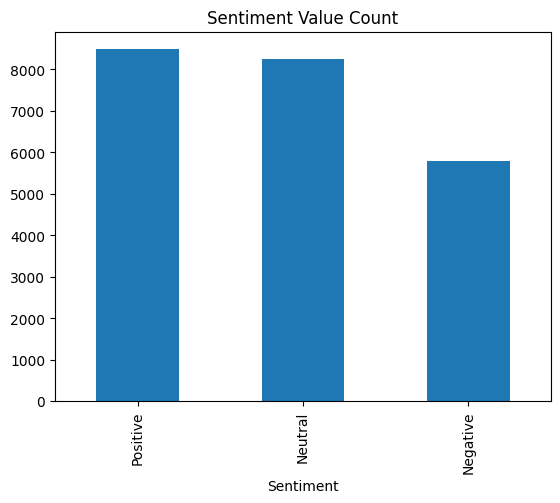

In [102]:
df.Sentiment.value_counts().plot(kind = 'bar')
plt.title("Sentiment Value Count")
plt.show();

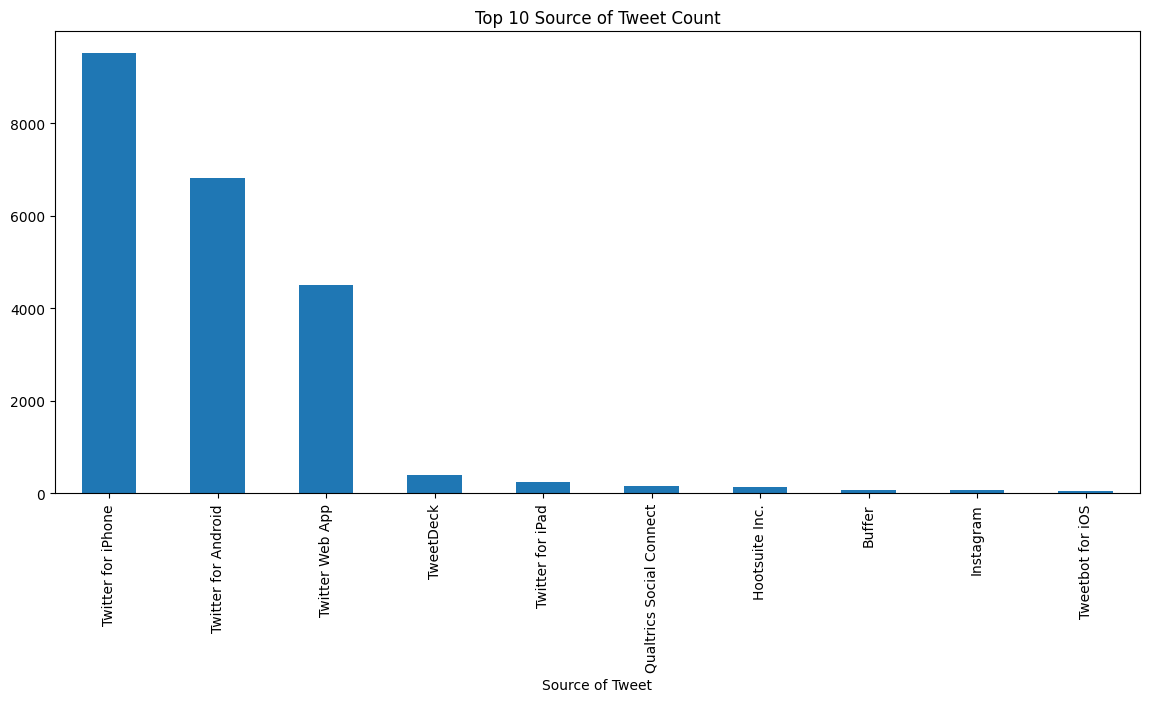

In [189]:
plt.figure(figsize=(14, 6))

df['Source of Tweet'].value_counts().head(10).plot(kind = 'bar')
plt.title("Top 10 Source of Tweet Count")
plt.show();

### Word Frequency and Word Cloud

Next, I wanted to take a look at the frequency of each words. As expected, the most common word is "worldcup" with a count of 25792. To visuaize this, I created a wordcloud in the shape of a ball.

In [103]:
word_freq = df.preprocessed_tweet.str.split().explode().value_counts().reset_index()
word_freq.columns = ["Word", "Frequency"]
word_freq['Frequency'] = word_freq.Frequency.astype(int)

word_freq

,Word,Frequency
0,worldcup,25792
1,qatar,8908
2,world,6161
3,cup,5605
4,fifaworldcup,4187
...,...,...
20448,awhile,1
20449,moneybag,1
20450,fuckryalready,1
20451,terriblewhere,1


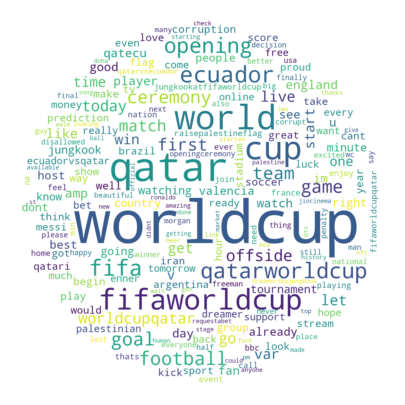

In [104]:
cloud_mask = np.array(Image.open("circle.jpeg"))

# Create a word cloud object
word_freq_dict = word_freq.set_index('Word')['Frequency'].to_dict() # convert dataframe to dictionary object to use generate_from_frequencies
word_cloud = WordCloud(width=1500, height=1500, background_color='white', mask=cloud_mask).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Time Series Sentiment Trends

In this Time Series Sentiment Trends, I wanted to take a look at the sentiment over time. As we can see, the positive sentiments starts off strong and is slightly above the other two sentiments. However, when all three hit their peaks, we find that the negative sentiments have the pinnacle at around 3:10PM or 15:00. 

After it dies down, the negative sentiment has the fewest of the three while the other two are about the same. 

In [105]:
# Assuming you have a DataFrame named 'df' with a datetime column 'timestamp'
datetime_min = df['Date Created'].min()
datetime_max = df['Date Created'].max()

print("Minimum Datetime:", datetime_min)
print("Maximum Datetime:", datetime_max)

Minimum Datetime: 2022-11-20 00:00:00+00:00
Maximum Datetime: 2022-11-20 23:59:21+00:00


<Figure size 1400x600 with 0 Axes>

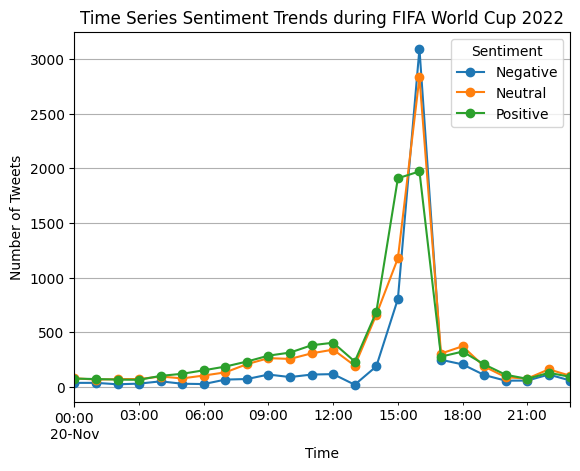

In [188]:
# Resample and count sentiment labels within time intervals
time_interval = 'H'
aggregated_df = df.groupby([pd.Grouper(key='Date Created', freq=time_interval), 'Sentiment']).size().unstack()

# Plot time series sentiment trends
plt.figure(figsize=(14, 6))
aggregated_df.plot(kind='line', marker='o')
plt.title('Time Series Sentiment Trends during FIFA World Cup 2022')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid()
plt.show();

## Sentiment Analysis & Prediction

### Vader 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for analyzing text sentiment in social media content, like tweets and other short texts.

VADER sentiment analysis doesn't rely solely on individual words, but also takes into account the context in which words appear to determine the sentiment of a sentence. It assigns a sentiment polarity to a text on a continuous scale, providing not only whether the text is positive, negative, or neutral, but also a strength of sentiment ranging from very negative to very positive.

However, after doing sentiment analysis on our tweet data, we find that the accuracy is only 58% which is abysmal. 

In [107]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

In [108]:
# Function to analyze sentiment and return sentiment label
def get_sentiment_label(text):
    sentiment_scores = sia.polarity_scores(text)
    
    if sentiment_scores['compound'] > 0.05:
        return "Positive"
    elif sentiment_scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment analysis function to the 'text' column
df['vader_sentiment'] = df['preprocessed_tweet'].apply(get_sentiment_label)

In [109]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,preprocessed_tweet,vader_sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,Neutral,drinking today worldcup,Neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,Positive,amazing worldcup launch video show much face c...,Positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,Positive,worth reading watching worldcup,Positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,Positive,golden maknae shinning bright jeonjungkook jun...,Positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",Negative,bbc care much human right homosexual right wom...,Positive


In [110]:
df['Sentiment'] = df.Sentiment.str.title()

# Calculate the accuracy
correct_predictions = (df['vader_sentiment'] == df['Sentiment']).sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions * 100

print("Accuracy: {:.2f}%".format(accuracy))


Accuracy: 57.67%


### XGBoost with CountVectorizer

The XGBoost model, integrated with the Count Vectorizer technique, constitutes a powerful ensemble learning approach for sentiment analysis on tweets. This amalgamation of advanced machine learning and natural language processing techniques offers a robust solution to decipher the sentiment expressed within the dynamic landscape of social media text.

Paired with the Count Vectorizer, which transforms text data into a numerical format suitable for machine learning algorithms, the XGBoost model becomes well-equipped to handle the unique linguistic characteristics of tweets. The Count Vectorizer converts the text into a matrix of token counts, creating a numerical representation that retains the essential textual information.

Although the accuracy has been improved to 0.69, I believe that it can still be made better. 

In [111]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
# Convert sentiment labels to numerical values
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
df['Sentiment_Num'] = df['Sentiment'].map(sentiment_mapping)

df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,preprocessed_tweet,vader_sentiment,Sentiment_Num
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,Neutral,drinking today worldcup,Neutral,1
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,Positive,amazing worldcup launch video show much face c...,Positive,2
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,Positive,worth reading watching worldcup,Positive,2
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,Positive,golden maknae shinning bright jeonjungkook jun...,Positive,2
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",Negative,bbc care much human right homosexual right wom...,Positive,0


In [113]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer() 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3)  # 3 classes: Positive, Neutral, Negative
xgb_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6943396226415094


### XGBoost with Gensim

In [194]:
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV

In [196]:
# Convert text data to Word2Vec embeddings
def text_to_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(word2vec_model.vector_size)

In [195]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, sg=1)

# Convert text data to Word2Vec embeddings
def text_to_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(word2vec_model.vector_size)

X_train_embed = np.array([text_to_embeddings(text) for text in X_train])
X_test_embed = np.array([text_to_embeddings(text) for text in X_test])

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3) 
xgb_classifier.fit(X_train_embed, y_train)

y_pred = xgb_classifier.predict(X_test_embed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6051054384017758


In [193]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], 
                                                    test_size=0.2, random_state=42)

# Tokenize the text data
tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, sg=1)

X_train_embed = np.array([text_to_embeddings(text) for text in X_train])
X_test_embed = np.array([text_to_embeddings(text) for text in X_test])

# Define XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_classifier, 
                           param_grid=param_grid, cv=3)
grid_search.fit(X_train_embed, y_train)

# Get the best estimator from grid search
best_xgb_classifier = grid_search.best_estimator_

y_pred = best_xgb_classifier.predict(X_test_embed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6077691453940066


In [198]:
best_xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

### Random Forest with CountVectorizer

Next I wanted to try out the Random Forest model to see if it might perform better than the XGB model and it did, achieving an accuracy of 0.69. However, similair to the XG Boost model, it didn't improve much even after fine-tuning it.

In [203]:
from sklearn.ensemble import RandomForestClassifier
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer() 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

y_pred = rf_classifier.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6925638179800222


In [204]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_vec, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  14.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.4s
[CV] END max_dept

### Random Forest with Gensim

While our base Random Forest model with Gensim isn't very good at .60, I was able to improve it to 0.7 with some fine-tuning.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], test_size=0.2, random_state=42)

tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, sg=1)

X_train_embed = np.array([text_to_embeddings(text) for text in X_train])
X_test_embed = np.array([text_to_embeddings(text) for text in X_test])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_embed, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_embed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6015538290788013


In [202]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train_vec, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_rf.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  17.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.5s
[CV] END max_dept

### Roberta Model

Utilizing the Roberta tokenization and model for sentiment analysis on tweets represents a sophisticated and cutting-edge approach to understanding the emotions and opinions embedded within social media discourse. This fusion of advanced language representation and sentiment analysis techniques brings about a new dimension of accuracy and contextual understanding in deciphering sentiment from the complex and varied structure of tweets.

Roberta, a variant of the transformer architecture, stands out as a prominent language model due to its exceptional ability to capture intricate contextual relationships within text. Tokenization in the context of Roberta involves dividing text into smaller units, or tokens, while retaining the richness of information present in the text. This technique allows Roberta to understand the nuanced semantics, sentence structure, and syntactical nuances that are particularly crucial when dealing with tweets, known for their brevity, slang, and informal language.

As seen in the result, I have achieved an 84.71% accuracy, using the base Roberta model. However, I'm not done yet, as I believe I can still make it better by fine-tuning the model.

In [50]:
# Load pre-trained RoBERTa model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"  # You can choose a different variant if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [21]:
def polarity_scores_roberta(Input):
    # Tokenize the input text using the tokenizer
    encoded_text = tokenizer(Input, return_tensors='pt')
    # Pass the tokenized input to the model and get the output
    output = model(**encoded_text)
    # Extract the scores from the output and convert it to a NumPy array
    scores = output[0][0].detach().numpy()
    # Apply softmax on the scores to normalize them
    scores = softmax(scores)
    # Return the normalized scores
    return scores

In [22]:
res = []
for i, row in tqdm(df.iterrows(), total=len(df)): 
  text= row['Tweet']
  res.append(polarity_scores_roberta(text))

  0%|          | 0/22524 [00:00<?, ?it/s]

In [23]:
roberta = []

for i in range(len(res)):
  argmax = np.argmax(res[i])
  if argmax == 0:
    roberta.append('negative')
  elif argmax == 1:
    roberta.append('neutral')
  else:
    roberta.append('positive')
df['Roberta'] = roberta

In [44]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,preprocessed_tweet,vader_sentiment,Roberta,Sentiment_Num
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,Neutral,drinking today worldcup,Neutral,Neutral,1
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,Positive,amazing worldcup launch video shows much face ...,Positive,Positive,2
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,Positive,worth reading watching worldcup,Positive,Neutral,2
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,Positive,golden maknae shinning bright jeonjungkook jun...,Positive,Positive,2
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",Negative,bbc cares much human rights homosexual rights ...,Neutral,Negative,0


In [25]:
df['Roberta'] = df.Roberta.str.title()

# Calculate the accuracy
correct_predictions = (df['Roberta'] == df['Sentiment']).sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions * 100

print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 84.71%


### Finetune Roberta Model with Train Test Split

Fine-tuning the Roberta tokenization and model for sentiment analysis on tweets represents a strategic approach that harnesses the power of pre-trained language models while tailoring them to the specific nuances and dynamics of sentiment expression within social media discourse. This process amalgamates the inherent capabilities of the Roberta model with the contextual understanding required for accurate sentiment classification in the unique landscape of tweets. The act of fine-tuning involves exposing the model to sentiment-labeled tweet data and allowing it to adjust its internal weights to align more closely with the sentiment patterns observed in the data.

The strategy of fine-tuning the Roberta tokenization and model for sentiment analysis on tweets brings the best of both worlds: the foundational understanding of a pre-trained model and the customization needed for accurate sentiment analysis in the unique landscape of Twitter. By aligning the model's language comprehension with the sentiment expressions specific to the FIFA World Cup 2022, stakeholders gain a highly accurate and contextually nuanced tool to extract deep insights from the sentiment dynamics within the world of social media conversations.

In this section, I've adjusted the learning rate, batch size and epochs. All of this yielded us an accuracy of 91% when we do a train-test split.

In [26]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df.Tweet.tolist(), df.Sentiment.tolist(), test_size=0.2, random_state=42)

# Map string labels to integers
label_map = {"Positive": 0, "Negative": 1, "Neutral": 2}
train_labels = [label_map[label] for label in train_labels]
test_labels = [label_map[label] for label in test_labels]

# Tokenize the data
train_encoded = tokenizer(train_texts, truncation=True, padding=True, max_length=128, return_tensors="pt", add_special_tokens=True)
test_encoded = tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt", add_special_tokens=True)

# Prepare the data for Trainer
train_dataset = torch.utils.data.TensorDataset(train_encoded['input_ids'], train_encoded['attention_mask'], torch.tensor(train_labels))
test_dataset = torch.utils.data.TensorDataset(test_encoded['input_ids'], test_encoded['attention_mask'], torch.tensor(test_labels))

# Create a custom collate function
def custom_collate_fn(batch):
    input_ids = torch.stack([item[0] for item in batch])
    attention_mask = torch.stack([item[1] for item in batch])
    labels = torch.tensor([item[2] for item in batch])
    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

# TrainingArguments and Trainer setup
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_dir='./logs',
    logging_steps=10,
)

# Trainer with custom collate function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=custom_collate_fn,
)

# Fine-tune the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()


  0%|          | 0/3381 [00:00<?, ?it/s]

{'loss': 1.8699, 'learning_rate': 9.970422951789412e-06, 'epoch': 0.01}
{'loss': 1.1963, 'learning_rate': 9.940845903578823e-06, 'epoch': 0.02}
{'loss': 1.0857, 'learning_rate': 9.911268855368235e-06, 'epoch': 0.03}
{'loss': 1.0505, 'learning_rate': 9.881691807157646e-06, 'epoch': 0.04}
{'loss': 1.034, 'learning_rate': 9.852114758947057e-06, 'epoch': 0.04}
{'loss': 0.8835, 'learning_rate': 9.82253771073647e-06, 'epoch': 0.05}
{'loss': 0.6444, 'learning_rate': 9.792960662525881e-06, 'epoch': 0.06}
{'loss': 0.4698, 'learning_rate': 9.763383614315292e-06, 'epoch': 0.07}
{'loss': 0.4269, 'learning_rate': 9.733806566104704e-06, 'epoch': 0.08}
{'loss': 0.488, 'learning_rate': 9.704229517894115e-06, 'epoch': 0.09}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.35239383578300476, 'eval_runtime': 37.6317, 'eval_samples_per_second': 119.713, 'eval_steps_per_second': 7.494, 'epoch': 0.09}
{'loss': 0.4297, 'learning_rate': 9.674652469683526e-06, 'epoch': 0.1}
{'loss': 0.4821, 'learning_rate': 9.645075421472937e-06, 'epoch': 0.11}
{'loss': 0.4021, 'learning_rate': 9.61549837326235e-06, 'epoch': 0.12}
{'loss': 0.3494, 'learning_rate': 9.58592132505176e-06, 'epoch': 0.12}
{'loss': 0.4666, 'learning_rate': 9.556344276841171e-06, 'epoch': 0.13}
{'loss': 0.3071, 'learning_rate': 9.526767228630584e-06, 'epoch': 0.14}
{'loss': 0.2821, 'learning_rate': 9.497190180419995e-06, 'epoch': 0.15}
{'loss': 0.3627, 'learning_rate': 9.467613132209406e-06, 'epoch': 0.16}
{'loss': 0.445, 'learning_rate': 9.438036083998818e-06, 'epoch': 0.17}
{'loss': 0.4368, 'learning_rate': 9.408459035788229e-06, 'epoch': 0.18}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.31992247700691223, 'eval_runtime': 39.6975, 'eval_samples_per_second': 113.483, 'eval_steps_per_second': 7.104, 'epoch': 0.18}
{'loss': 0.4793, 'learning_rate': 9.37888198757764e-06, 'epoch': 0.19}
{'loss': 0.242, 'learning_rate': 9.349304939367051e-06, 'epoch': 0.2}
{'loss': 0.3583, 'learning_rate': 9.319727891156464e-06, 'epoch': 0.2}
{'loss': 0.3363, 'learning_rate': 9.290150842945874e-06, 'epoch': 0.21}
{'loss': 0.4121, 'learning_rate': 9.260573794735285e-06, 'epoch': 0.22}
{'loss': 0.4229, 'learning_rate': 9.230996746524698e-06, 'epoch': 0.23}
{'loss': 0.3436, 'learning_rate': 9.20141969831411e-06, 'epoch': 0.24}
{'loss': 0.3606, 'learning_rate': 9.17184265010352e-06, 'epoch': 0.25}
{'loss': 0.3871, 'learning_rate': 9.142265601892932e-06, 'epoch': 0.26}
{'loss': 0.3282, 'learning_rate': 9.112688553682343e-06, 'epoch': 0.27}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2718265652656555, 'eval_runtime': 37.577, 'eval_samples_per_second': 119.887, 'eval_steps_per_second': 7.505, 'epoch': 0.27}
{'loss': 0.2453, 'learning_rate': 9.083111505471754e-06, 'epoch': 0.28}
{'loss': 0.3649, 'learning_rate': 9.053534457261165e-06, 'epoch': 0.28}
{'loss': 0.3786, 'learning_rate': 9.023957409050578e-06, 'epoch': 0.29}
{'loss': 0.2963, 'learning_rate': 8.99438036083999e-06, 'epoch': 0.3}
{'loss': 0.4345, 'learning_rate': 8.964803312629399e-06, 'epoch': 0.31}
{'loss': 0.3087, 'learning_rate': 8.935226264418812e-06, 'epoch': 0.32}
{'loss': 0.3736, 'learning_rate': 8.905649216208223e-06, 'epoch': 0.33}
{'loss': 0.2815, 'learning_rate': 8.876072167997635e-06, 'epoch': 0.34}
{'loss': 0.3659, 'learning_rate': 8.846495119787046e-06, 'epoch': 0.35}
{'loss': 0.2659, 'learning_rate': 8.816918071576457e-06, 'epoch': 0.35}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2742076814174652, 'eval_runtime': 38.1847, 'eval_samples_per_second': 117.979, 'eval_steps_per_second': 7.385, 'epoch': 0.35}
{'loss': 0.2535, 'learning_rate': 8.787341023365868e-06, 'epoch': 0.36}
{'loss': 0.4053, 'learning_rate': 8.75776397515528e-06, 'epoch': 0.37}
{'loss': 0.2634, 'learning_rate': 8.728186926944692e-06, 'epoch': 0.38}
{'loss': 0.4383, 'learning_rate': 8.698609878734104e-06, 'epoch': 0.39}
{'loss': 0.4007, 'learning_rate': 8.669032830523515e-06, 'epoch': 0.4}
{'loss': 0.3185, 'learning_rate': 8.639455782312926e-06, 'epoch': 0.41}
{'loss': 0.4429, 'learning_rate': 8.609878734102337e-06, 'epoch': 0.42}
{'loss': 0.3312, 'learning_rate': 8.580301685891749e-06, 'epoch': 0.43}
{'loss': 0.2442, 'learning_rate': 8.55072463768116e-06, 'epoch': 0.43}
{'loss': 0.3081, 'learning_rate': 8.521147589470573e-06, 'epoch': 0.44}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.27865880727767944, 'eval_runtime': 38.7089, 'eval_samples_per_second': 116.382, 'eval_steps_per_second': 7.285, 'epoch': 0.44}
{'loss': 0.3733, 'learning_rate': 8.491570541259982e-06, 'epoch': 0.45}
{'loss': 0.3972, 'learning_rate': 8.461993493049394e-06, 'epoch': 0.46}
{'loss': 0.2864, 'learning_rate': 8.432416444838806e-06, 'epoch': 0.47}
{'loss': 0.2797, 'learning_rate': 8.402839396628218e-06, 'epoch': 0.48}
{'loss': 0.2376, 'learning_rate': 8.373262348417629e-06, 'epoch': 0.49}
{'loss': 0.2879, 'learning_rate': 8.34368530020704e-06, 'epoch': 0.5}
{'loss': 0.2531, 'learning_rate': 8.314108251996451e-06, 'epoch': 0.51}
{'loss': 0.3447, 'learning_rate': 8.284531203785863e-06, 'epoch': 0.51}
{'loss': 0.2411, 'learning_rate': 8.254954155575274e-06, 'epoch': 0.52}
{'loss': 0.3178, 'learning_rate': 8.225377107364687e-06, 'epoch': 0.53}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3051053583621979, 'eval_runtime': 38.7363, 'eval_samples_per_second': 116.299, 'eval_steps_per_second': 7.28, 'epoch': 0.53}
{'loss': 0.264, 'learning_rate': 8.195800059154098e-06, 'epoch': 0.54}
{'loss': 0.3482, 'learning_rate': 8.166223010943508e-06, 'epoch': 0.55}
{'loss': 0.3242, 'learning_rate': 8.13664596273292e-06, 'epoch': 0.56}
{'loss': 0.3878, 'learning_rate': 8.107068914522332e-06, 'epoch': 0.57}
{'loss': 0.2435, 'learning_rate': 8.077491866311743e-06, 'epoch': 0.58}
{'loss': 0.3774, 'learning_rate': 8.047914818101154e-06, 'epoch': 0.59}
{'loss': 0.2998, 'learning_rate': 8.018337769890565e-06, 'epoch': 0.59}
{'loss': 0.391, 'learning_rate': 7.988760721679977e-06, 'epoch': 0.6}
{'loss': 0.3321, 'learning_rate': 7.959183673469388e-06, 'epoch': 0.61}
{'loss': 0.3397, 'learning_rate': 7.9296066252588e-06, 'epoch': 0.62}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2628634572029114, 'eval_runtime': 37.8251, 'eval_samples_per_second': 119.101, 'eval_steps_per_second': 7.455, 'epoch': 0.62}
{'loss': 0.2842, 'learning_rate': 7.900029577048212e-06, 'epoch': 0.63}
{'loss': 0.3582, 'learning_rate': 7.870452528837622e-06, 'epoch': 0.64}
{'loss': 0.2414, 'learning_rate': 7.840875480627035e-06, 'epoch': 0.65}
{'loss': 0.3457, 'learning_rate': 7.811298432416446e-06, 'epoch': 0.66}
{'loss': 0.3204, 'learning_rate': 7.781721384205857e-06, 'epoch': 0.67}
{'loss': 0.3237, 'learning_rate': 7.752144335995268e-06, 'epoch': 0.67}
{'loss': 0.3273, 'learning_rate': 7.72256728778468e-06, 'epoch': 0.68}
{'loss': 0.3779, 'learning_rate': 7.69299023957409e-06, 'epoch': 0.69}
{'loss': 0.2402, 'learning_rate': 7.663413191363502e-06, 'epoch': 0.7}
{'loss': 0.2883, 'learning_rate': 7.633836143152913e-06, 'epoch': 0.71}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2557736039161682, 'eval_runtime': 37.1651, 'eval_samples_per_second': 121.216, 'eval_steps_per_second': 7.588, 'epoch': 0.71}
{'loss': 0.3437, 'learning_rate': 7.604259094942325e-06, 'epoch': 0.72}
{'loss': 0.166, 'learning_rate': 7.574682046731737e-06, 'epoch': 0.73}
{'loss': 0.2501, 'learning_rate': 7.545104998521148e-06, 'epoch': 0.74}
{'loss': 0.2254, 'learning_rate': 7.515527950310559e-06, 'epoch': 0.75}
{'loss': 0.4241, 'learning_rate': 7.485950902099971e-06, 'epoch': 0.75}
{'loss': 0.314, 'learning_rate': 7.456373853889382e-06, 'epoch': 0.76}
{'loss': 0.242, 'learning_rate': 7.426796805678794e-06, 'epoch': 0.77}
{'loss': 0.2143, 'learning_rate': 7.397219757468205e-06, 'epoch': 0.78}
{'loss': 0.2813, 'learning_rate': 7.367642709257616e-06, 'epoch': 0.79}
{'loss': 0.3342, 'learning_rate': 7.338065661047028e-06, 'epoch': 0.8}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2596639096736908, 'eval_runtime': 37.3226, 'eval_samples_per_second': 120.704, 'eval_steps_per_second': 7.556, 'epoch': 0.8}
{'loss': 0.4161, 'learning_rate': 7.308488612836439e-06, 'epoch': 0.81}
{'loss': 0.3591, 'learning_rate': 7.278911564625851e-06, 'epoch': 0.82}
{'loss': 0.2791, 'learning_rate': 7.249334516415263e-06, 'epoch': 0.83}
{'loss': 0.2331, 'learning_rate': 7.219757468204673e-06, 'epoch': 0.83}
{'loss': 0.2337, 'learning_rate': 7.190180419994085e-06, 'epoch': 0.84}
{'loss': 0.2952, 'learning_rate': 7.160603371783496e-06, 'epoch': 0.85}
{'loss': 0.3227, 'learning_rate': 7.131026323572908e-06, 'epoch': 0.86}
{'loss': 0.2374, 'learning_rate': 7.10144927536232e-06, 'epoch': 0.87}
{'loss': 0.1978, 'learning_rate': 7.07187222715173e-06, 'epoch': 0.88}
{'loss': 0.2847, 'learning_rate': 7.042295178941142e-06, 'epoch': 0.89}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.26624682545661926, 'eval_runtime': 37.421, 'eval_samples_per_second': 120.387, 'eval_steps_per_second': 7.536, 'epoch': 0.89}
{'loss': 0.2706, 'learning_rate': 7.012718130730553e-06, 'epoch': 0.9}
{'loss': 0.3131, 'learning_rate': 6.983141082519965e-06, 'epoch': 0.91}
{'loss': 0.2388, 'learning_rate': 6.953564034309377e-06, 'epoch': 0.91}
{'loss': 0.3206, 'learning_rate': 6.923986986098787e-06, 'epoch': 0.92}
{'loss': 0.3022, 'learning_rate': 6.894409937888199e-06, 'epoch': 0.93}
{'loss': 0.2091, 'learning_rate': 6.86483288967761e-06, 'epoch': 0.94}
{'loss': 0.2703, 'learning_rate': 6.8352558414670224e-06, 'epoch': 0.95}
{'loss': 0.2846, 'learning_rate': 6.805678793256434e-06, 'epoch': 0.96}
{'loss': 0.357, 'learning_rate': 6.776101745045846e-06, 'epoch': 0.97}
{'loss': 0.2673, 'learning_rate': 6.746524696835256e-06, 'epoch': 0.98}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.23440301418304443, 'eval_runtime': 37.5306, 'eval_samples_per_second': 120.035, 'eval_steps_per_second': 7.514, 'epoch': 0.98}
{'loss': 0.234, 'learning_rate': 6.716947648624667e-06, 'epoch': 0.98}
{'loss': 0.3197, 'learning_rate': 6.6873706004140795e-06, 'epoch': 0.99}
{'loss': 0.1941, 'learning_rate': 6.657793552203491e-06, 'epoch': 1.0}
{'loss': 0.2013, 'learning_rate': 6.628216503992903e-06, 'epoch': 1.01}
{'loss': 0.1375, 'learning_rate': 6.598639455782313e-06, 'epoch': 1.02}
{'loss': 0.1661, 'learning_rate': 6.569062407571724e-06, 'epoch': 1.03}
{'loss': 0.1825, 'learning_rate': 6.5394853593611365e-06, 'epoch': 1.04}
{'loss': 0.2552, 'learning_rate': 6.509908311150548e-06, 'epoch': 1.05}
{'loss': 0.1098, 'learning_rate': 6.48033126293996e-06, 'epoch': 1.06}
{'loss': 0.189, 'learning_rate': 6.45075421472937e-06, 'epoch': 1.06}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2987563908100128, 'eval_runtime': 37.5882, 'eval_samples_per_second': 119.851, 'eval_steps_per_second': 7.502, 'epoch': 1.06}
{'loss': 0.1483, 'learning_rate': 6.421177166518781e-06, 'epoch': 1.07}
{'loss': 0.2447, 'learning_rate': 6.3916001183081935e-06, 'epoch': 1.08}
{'loss': 0.2152, 'learning_rate': 6.362023070097605e-06, 'epoch': 1.09}
{'loss': 0.1847, 'learning_rate': 6.332446021887017e-06, 'epoch': 1.1}
{'loss': 0.2829, 'learning_rate': 6.302868973676428e-06, 'epoch': 1.11}
{'loss': 0.1442, 'learning_rate': 6.2732919254658384e-06, 'epoch': 1.12}
{'loss': 0.214, 'learning_rate': 6.2437148772552505e-06, 'epoch': 1.13}
{'loss': 0.2641, 'learning_rate': 6.214137829044662e-06, 'epoch': 1.14}
{'loss': 0.3218, 'learning_rate': 6.184560780834074e-06, 'epoch': 1.14}
{'loss': 0.1305, 'learning_rate': 6.154983732623485e-06, 'epoch': 1.15}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2465977966785431, 'eval_runtime': 37.601, 'eval_samples_per_second': 119.811, 'eval_steps_per_second': 7.5, 'epoch': 1.15}
{'loss': 0.2622, 'learning_rate': 6.1254066844128955e-06, 'epoch': 1.16}
{'loss': 0.1507, 'learning_rate': 6.0958296362023075e-06, 'epoch': 1.17}
{'loss': 0.1528, 'learning_rate': 6.066252587991719e-06, 'epoch': 1.18}
{'loss': 0.1661, 'learning_rate': 6.036675539781131e-06, 'epoch': 1.19}
{'loss': 0.2129, 'learning_rate': 6.007098491570542e-06, 'epoch': 1.2}
{'loss': 0.2264, 'learning_rate': 5.9775214433599525e-06, 'epoch': 1.21}
{'loss': 0.2104, 'learning_rate': 5.9479443951493646e-06, 'epoch': 1.22}
{'loss': 0.1971, 'learning_rate': 5.918367346938776e-06, 'epoch': 1.22}
{'loss': 0.2726, 'learning_rate': 5.888790298728188e-06, 'epoch': 1.23}
{'loss': 0.3078, 'learning_rate': 5.859213250517599e-06, 'epoch': 1.24}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2605326175689697, 'eval_runtime': 37.3568, 'eval_samples_per_second': 120.594, 'eval_steps_per_second': 7.549, 'epoch': 1.24}
{'loss': 0.1339, 'learning_rate': 5.82963620230701e-06, 'epoch': 1.25}
{'loss': 0.1694, 'learning_rate': 5.800059154096422e-06, 'epoch': 1.26}
{'loss': 0.1271, 'learning_rate': 5.770482105885833e-06, 'epoch': 1.27}
{'loss': 0.1566, 'learning_rate': 5.740905057675245e-06, 'epoch': 1.28}
{'loss': 0.2737, 'learning_rate': 5.711328009464656e-06, 'epoch': 1.29}
{'loss': 0.3012, 'learning_rate': 5.681750961254067e-06, 'epoch': 1.3}
{'loss': 0.2361, 'learning_rate': 5.652173913043479e-06, 'epoch': 1.3}
{'loss': 0.2375, 'learning_rate': 5.62259686483289e-06, 'epoch': 1.31}
{'loss': 0.2305, 'learning_rate': 5.593019816622302e-06, 'epoch': 1.32}
{'loss': 0.166, 'learning_rate': 5.563442768411713e-06, 'epoch': 1.33}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.31200969219207764, 'eval_runtime': 37.4311, 'eval_samples_per_second': 120.354, 'eval_steps_per_second': 7.534, 'epoch': 1.33}
{'loss': 0.2015, 'learning_rate': 5.533865720201124e-06, 'epoch': 1.34}
{'loss': 0.1304, 'learning_rate': 5.504288671990536e-06, 'epoch': 1.35}
{'loss': 0.1645, 'learning_rate': 5.474711623779947e-06, 'epoch': 1.36}
{'loss': 0.264, 'learning_rate': 5.445134575569359e-06, 'epoch': 1.37}
{'loss': 0.3316, 'learning_rate': 5.41555752735877e-06, 'epoch': 1.38}
{'loss': 0.1453, 'learning_rate': 5.385980479148181e-06, 'epoch': 1.38}
{'loss': 0.1754, 'learning_rate': 5.3564034309375935e-06, 'epoch': 1.39}
{'loss': 0.2364, 'learning_rate': 5.326826382727004e-06, 'epoch': 1.4}
{'loss': 0.1926, 'learning_rate': 5.297249334516415e-06, 'epoch': 1.41}
{'loss': 0.1229, 'learning_rate': 5.267672286305827e-06, 'epoch': 1.42}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2905493676662445, 'eval_runtime': 39.8376, 'eval_samples_per_second': 113.084, 'eval_steps_per_second': 7.079, 'epoch': 1.42}
{'loss': 0.1976, 'learning_rate': 5.2380952380952384e-06, 'epoch': 1.43}
{'loss': 0.2576, 'learning_rate': 5.2085181898846505e-06, 'epoch': 1.44}
{'loss': 0.1724, 'learning_rate': 5.178941141674061e-06, 'epoch': 1.45}
{'loss': 0.213, 'learning_rate': 5.149364093463472e-06, 'epoch': 1.46}
{'loss': 0.2671, 'learning_rate': 5.119787045252884e-06, 'epoch': 1.46}
{'loss': 0.1668, 'learning_rate': 5.0902099970422955e-06, 'epoch': 1.47}
{'loss': 0.1663, 'learning_rate': 5.0606329488317075e-06, 'epoch': 1.48}
{'loss': 0.3121, 'learning_rate': 5.031055900621118e-06, 'epoch': 1.49}
{'loss': 0.2034, 'learning_rate': 5.001478852410529e-06, 'epoch': 1.5}
{'loss': 0.1563, 'learning_rate': 4.971901804199941e-06, 'epoch': 1.51}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2543196380138397, 'eval_runtime': 38.4307, 'eval_samples_per_second': 117.224, 'eval_steps_per_second': 7.338, 'epoch': 1.51}
{'loss': 0.2209, 'learning_rate': 4.9423247559893525e-06, 'epoch': 1.52}
{'loss': 0.2427, 'learning_rate': 4.912747707778764e-06, 'epoch': 1.53}
{'loss': 0.1752, 'learning_rate': 4.883170659568176e-06, 'epoch': 1.54}
{'loss': 0.215, 'learning_rate': 4.853593611357587e-06, 'epoch': 1.54}
{'loss': 0.2524, 'learning_rate': 4.824016563146998e-06, 'epoch': 1.55}
{'loss': 0.2273, 'learning_rate': 4.7944395149364095e-06, 'epoch': 1.56}
{'loss': 0.2925, 'learning_rate': 4.764862466725822e-06, 'epoch': 1.57}
{'loss': 0.1657, 'learning_rate': 4.735285418515233e-06, 'epoch': 1.58}
{'loss': 0.1927, 'learning_rate': 4.705708370304644e-06, 'epoch': 1.59}
{'loss': 0.2056, 'learning_rate': 4.676131322094055e-06, 'epoch': 1.6}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2476370632648468, 'eval_runtime': 38.6416, 'eval_samples_per_second': 116.584, 'eval_steps_per_second': 7.298, 'epoch': 1.6}
{'loss': 0.2131, 'learning_rate': 4.6465542738834665e-06, 'epoch': 1.61}
{'loss': 0.1839, 'learning_rate': 4.616977225672879e-06, 'epoch': 1.61}
{'loss': 0.258, 'learning_rate': 4.58740017746229e-06, 'epoch': 1.62}
{'loss': 0.1896, 'learning_rate': 4.557823129251701e-06, 'epoch': 1.63}
{'loss': 0.1619, 'learning_rate': 4.528246081041112e-06, 'epoch': 1.64}
{'loss': 0.237, 'learning_rate': 4.4986690328305236e-06, 'epoch': 1.65}
{'loss': 0.2113, 'learning_rate': 4.469091984619936e-06, 'epoch': 1.66}
{'loss': 0.1432, 'learning_rate': 4.439514936409347e-06, 'epoch': 1.67}
{'loss': 0.1921, 'learning_rate': 4.409937888198758e-06, 'epoch': 1.68}
{'loss': 0.1673, 'learning_rate': 4.380360839988169e-06, 'epoch': 1.69}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3152260184288025, 'eval_runtime': 38.5748, 'eval_samples_per_second': 116.786, 'eval_steps_per_second': 7.31, 'epoch': 1.69}
{'loss': 0.1823, 'learning_rate': 4.3507837917775806e-06, 'epoch': 1.69}
{'loss': 0.1524, 'learning_rate': 4.321206743566993e-06, 'epoch': 1.7}
{'loss': 0.2897, 'learning_rate': 4.291629695356404e-06, 'epoch': 1.71}
{'loss': 0.1362, 'learning_rate': 4.262052647145815e-06, 'epoch': 1.72}
{'loss': 0.1401, 'learning_rate': 4.232475598935226e-06, 'epoch': 1.73}
{'loss': 0.2355, 'learning_rate': 4.202898550724638e-06, 'epoch': 1.74}
{'loss': 0.1455, 'learning_rate': 4.17332150251405e-06, 'epoch': 1.75}
{'loss': 0.1804, 'learning_rate': 4.143744454303461e-06, 'epoch': 1.76}
{'loss': 0.0737, 'learning_rate': 4.114167406092872e-06, 'epoch': 1.77}
{'loss': 0.2279, 'learning_rate': 4.084590357882283e-06, 'epoch': 1.77}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.35538673400878906, 'eval_runtime': 38.8594, 'eval_samples_per_second': 115.931, 'eval_steps_per_second': 7.257, 'epoch': 1.77}
{'loss': 0.2252, 'learning_rate': 4.055013309671695e-06, 'epoch': 1.78}
{'loss': 0.1909, 'learning_rate': 4.025436261461107e-06, 'epoch': 1.79}
{'loss': 0.2301, 'learning_rate': 3.995859213250518e-06, 'epoch': 1.8}
{'loss': 0.2302, 'learning_rate': 3.966282165039929e-06, 'epoch': 1.81}
{'loss': 0.2031, 'learning_rate': 3.93670511682934e-06, 'epoch': 1.82}
{'loss': 0.1521, 'learning_rate': 3.9071280686187525e-06, 'epoch': 1.83}
{'loss': 0.2222, 'learning_rate': 3.877551020408164e-06, 'epoch': 1.84}
{'loss': 0.1539, 'learning_rate': 3.847973972197575e-06, 'epoch': 1.85}
{'loss': 0.1676, 'learning_rate': 3.818396923986986e-06, 'epoch': 1.85}
{'loss': 0.2224, 'learning_rate': 3.788819875776398e-06, 'epoch': 1.86}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2868574261665344, 'eval_runtime': 38.1682, 'eval_samples_per_second': 118.03, 'eval_steps_per_second': 7.388, 'epoch': 1.86}
{'loss': 0.2256, 'learning_rate': 3.7592428275658095e-06, 'epoch': 1.87}
{'loss': 0.1825, 'learning_rate': 3.7296657793552203e-06, 'epoch': 1.88}
{'loss': 0.2329, 'learning_rate': 3.700088731144632e-06, 'epoch': 1.89}
{'loss': 0.2152, 'learning_rate': 3.6705116829340436e-06, 'epoch': 1.9}
{'loss': 0.1367, 'learning_rate': 3.640934634723455e-06, 'epoch': 1.91}
{'loss': 0.2443, 'learning_rate': 3.6113575865128665e-06, 'epoch': 1.92}
{'loss': 0.1361, 'learning_rate': 3.5817805383022773e-06, 'epoch': 1.93}
{'loss': 0.1172, 'learning_rate': 3.552203490091689e-06, 'epoch': 1.93}
{'loss': 0.2237, 'learning_rate': 3.5226264418811007e-06, 'epoch': 1.94}
{'loss': 0.2562, 'learning_rate': 3.493049393670512e-06, 'epoch': 1.95}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.2976354956626892, 'eval_runtime': 38.9483, 'eval_samples_per_second': 115.666, 'eval_steps_per_second': 7.24, 'epoch': 1.95}
{'loss': 0.3298, 'learning_rate': 3.4634723454599236e-06, 'epoch': 1.96}
{'loss': 0.2257, 'learning_rate': 3.433895297249335e-06, 'epoch': 1.97}
{'loss': 0.241, 'learning_rate': 3.404318249038746e-06, 'epoch': 1.98}
{'loss': 0.2774, 'learning_rate': 3.3747412008281577e-06, 'epoch': 1.99}
{'loss': 0.1818, 'learning_rate': 3.345164152617569e-06, 'epoch': 2.0}
{'loss': 0.1264, 'learning_rate': 3.3155871044069806e-06, 'epoch': 2.01}
{'loss': 0.1405, 'learning_rate': 3.286010056196392e-06, 'epoch': 2.01}
{'loss': 0.0956, 'learning_rate': 3.256433007985803e-06, 'epoch': 2.02}
{'loss': 0.0775, 'learning_rate': 3.2268559597752147e-06, 'epoch': 2.03}
{'loss': 0.0955, 'learning_rate': 3.1972789115646264e-06, 'epoch': 2.04}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.35348233580589294, 'eval_runtime': 40.3949, 'eval_samples_per_second': 111.524, 'eval_steps_per_second': 6.981, 'epoch': 2.04}
{'loss': 0.0625, 'learning_rate': 3.1677018633540376e-06, 'epoch': 2.05}
{'loss': 0.121, 'learning_rate': 3.138124815143449e-06, 'epoch': 2.06}
{'loss': 0.0883, 'learning_rate': 3.10854776693286e-06, 'epoch': 2.07}
{'loss': 0.1758, 'learning_rate': 3.0789707187222717e-06, 'epoch': 2.08}
{'loss': 0.1172, 'learning_rate': 3.0493936705116834e-06, 'epoch': 2.09}
{'loss': 0.162, 'learning_rate': 3.019816622301094e-06, 'epoch': 2.09}
{'loss': 0.1161, 'learning_rate': 2.990239574090506e-06, 'epoch': 2.1}
{'loss': 0.1196, 'learning_rate': 2.9606625258799175e-06, 'epoch': 2.11}
{'loss': 0.1014, 'learning_rate': 2.9310854776693287e-06, 'epoch': 2.12}
{'loss': 0.1972, 'learning_rate': 2.9015084294587404e-06, 'epoch': 2.13}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.4338337481021881, 'eval_runtime': 38.264, 'eval_samples_per_second': 117.735, 'eval_steps_per_second': 7.37, 'epoch': 2.13}
{'loss': 0.1432, 'learning_rate': 2.8719313812481512e-06, 'epoch': 2.14}
{'loss': 0.1456, 'learning_rate': 2.842354333037563e-06, 'epoch': 2.15}
{'loss': 0.1341, 'learning_rate': 2.8127772848269745e-06, 'epoch': 2.16}
{'loss': 0.0714, 'learning_rate': 2.7832002366163858e-06, 'epoch': 2.17}
{'loss': 0.1675, 'learning_rate': 2.7536231884057974e-06, 'epoch': 2.17}
{'loss': 0.1431, 'learning_rate': 2.724046140195209e-06, 'epoch': 2.18}
{'loss': 0.2299, 'learning_rate': 2.69446909198462e-06, 'epoch': 2.19}
{'loss': 0.294, 'learning_rate': 2.6648920437740316e-06, 'epoch': 2.2}
{'loss': 0.1128, 'learning_rate': 2.6353149955634428e-06, 'epoch': 2.21}
{'loss': 0.1779, 'learning_rate': 2.6057379473528544e-06, 'epoch': 2.22}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3346981406211853, 'eval_runtime': 39.5183, 'eval_samples_per_second': 113.998, 'eval_steps_per_second': 7.136, 'epoch': 2.22}
{'loss': 0.1077, 'learning_rate': 2.576160899142266e-06, 'epoch': 2.23}
{'loss': 0.0857, 'learning_rate': 2.546583850931677e-06, 'epoch': 2.24}
{'loss': 0.109, 'learning_rate': 2.5170068027210886e-06, 'epoch': 2.24}
{'loss': 0.0642, 'learning_rate': 2.4874297545105e-06, 'epoch': 2.25}
{'loss': 0.3233, 'learning_rate': 2.4578527062999115e-06, 'epoch': 2.26}
{'loss': 0.221, 'learning_rate': 2.428275658089323e-06, 'epoch': 2.27}
{'loss': 0.1863, 'learning_rate': 2.3986986098787344e-06, 'epoch': 2.28}
{'loss': 0.1721, 'learning_rate': 2.3691215616681456e-06, 'epoch': 2.29}
{'loss': 0.1806, 'learning_rate': 2.339544513457557e-06, 'epoch': 2.3}
{'loss': 0.1224, 'learning_rate': 2.3099674652469685e-06, 'epoch': 2.31}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3444347381591797, 'eval_runtime': 38.5061, 'eval_samples_per_second': 116.994, 'eval_steps_per_second': 7.324, 'epoch': 2.31}
{'loss': 0.092, 'learning_rate': 2.28039041703638e-06, 'epoch': 2.32}
{'loss': 0.0958, 'learning_rate': 2.2508133688257914e-06, 'epoch': 2.32}
{'loss': 0.1576, 'learning_rate': 2.2212363206152026e-06, 'epoch': 2.33}
{'loss': 0.2166, 'learning_rate': 2.1916592724046143e-06, 'epoch': 2.34}
{'loss': 0.2602, 'learning_rate': 2.1620822241940255e-06, 'epoch': 2.35}
{'loss': 0.1571, 'learning_rate': 2.132505175983437e-06, 'epoch': 2.36}
{'loss': 0.1165, 'learning_rate': 2.1029281277728484e-06, 'epoch': 2.37}
{'loss': 0.2412, 'learning_rate': 2.07335107956226e-06, 'epoch': 2.38}
{'loss': 0.2768, 'learning_rate': 2.0437740313516713e-06, 'epoch': 2.39}
{'loss': 0.1687, 'learning_rate': 2.0141969831410825e-06, 'epoch': 2.4}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.38087865710258484, 'eval_runtime': 38.7824, 'eval_samples_per_second': 116.161, 'eval_steps_per_second': 7.271, 'epoch': 2.4}
{'loss': 0.2781, 'learning_rate': 1.984619934930494e-06, 'epoch': 2.4}
{'loss': 0.0664, 'learning_rate': 1.9550428867199054e-06, 'epoch': 2.41}
{'loss': 0.1685, 'learning_rate': 1.925465838509317e-06, 'epoch': 2.42}
{'loss': 0.106, 'learning_rate': 1.8958887902987283e-06, 'epoch': 2.43}
{'loss': 0.1191, 'learning_rate': 1.8663117420881396e-06, 'epoch': 2.44}
{'loss': 0.1166, 'learning_rate': 1.8367346938775512e-06, 'epoch': 2.45}
{'loss': 0.2128, 'learning_rate': 1.8071576456669627e-06, 'epoch': 2.46}
{'loss': 0.1608, 'learning_rate': 1.777580597456374e-06, 'epoch': 2.47}
{'loss': 0.1075, 'learning_rate': 1.7480035492457853e-06, 'epoch': 2.48}
{'loss': 0.2084, 'learning_rate': 1.718426501035197e-06, 'epoch': 2.48}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3689902424812317, 'eval_runtime': 38.8344, 'eval_samples_per_second': 116.006, 'eval_steps_per_second': 7.262, 'epoch': 2.48}
{'loss': 0.1132, 'learning_rate': 1.6888494528246082e-06, 'epoch': 2.49}
{'loss': 0.153, 'learning_rate': 1.6592724046140197e-06, 'epoch': 2.5}
{'loss': 0.0988, 'learning_rate': 1.629695356403431e-06, 'epoch': 2.51}
{'loss': 0.1666, 'learning_rate': 1.6001183081928426e-06, 'epoch': 2.52}
{'loss': 0.0984, 'learning_rate': 1.570541259982254e-06, 'epoch': 2.53}
{'loss': 0.1933, 'learning_rate': 1.5409642117716653e-06, 'epoch': 2.54}
{'loss': 0.1711, 'learning_rate': 1.5113871635610767e-06, 'epoch': 2.55}
{'loss': 0.2213, 'learning_rate': 1.4818101153504882e-06, 'epoch': 2.56}
{'loss': 0.1219, 'learning_rate': 1.4522330671398996e-06, 'epoch': 2.56}
{'loss': 0.153, 'learning_rate': 1.4226560189293108e-06, 'epoch': 2.57}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3457258641719818, 'eval_runtime': 38.129, 'eval_samples_per_second': 118.152, 'eval_steps_per_second': 7.396, 'epoch': 2.57}
{'loss': 0.0866, 'learning_rate': 1.3930789707187223e-06, 'epoch': 2.58}
{'loss': 0.0593, 'learning_rate': 1.363501922508134e-06, 'epoch': 2.59}
{'loss': 0.1646, 'learning_rate': 1.3339248742975452e-06, 'epoch': 2.6}
{'loss': 0.1022, 'learning_rate': 1.3043478260869566e-06, 'epoch': 2.61}
{'loss': 0.1936, 'learning_rate': 1.2747707778763679e-06, 'epoch': 2.62}
{'loss': 0.1146, 'learning_rate': 1.2451937296657795e-06, 'epoch': 2.63}
{'loss': 0.1975, 'learning_rate': 1.215616681455191e-06, 'epoch': 2.64}
{'loss': 0.0594, 'learning_rate': 1.1860396332446022e-06, 'epoch': 2.64}
{'loss': 0.1484, 'learning_rate': 1.1564625850340136e-06, 'epoch': 2.65}
{'loss': 0.2078, 'learning_rate': 1.126885536823425e-06, 'epoch': 2.66}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.35379868745803833, 'eval_runtime': 38.323, 'eval_samples_per_second': 117.553, 'eval_steps_per_second': 7.359, 'epoch': 2.66}
{'loss': 0.2028, 'learning_rate': 1.0973084886128365e-06, 'epoch': 2.67}
{'loss': 0.1438, 'learning_rate': 1.067731440402248e-06, 'epoch': 2.68}
{'loss': 0.0486, 'learning_rate': 1.0381543921916594e-06, 'epoch': 2.69}
{'loss': 0.0629, 'learning_rate': 1.0085773439810707e-06, 'epoch': 2.7}
{'loss': 0.1019, 'learning_rate': 9.790002957704823e-07, 'epoch': 2.71}
{'loss': 0.1995, 'learning_rate': 9.494232475598936e-07, 'epoch': 2.72}
{'loss': 0.1508, 'learning_rate': 9.19846199349305e-07, 'epoch': 2.72}
{'loss': 0.1557, 'learning_rate': 8.902691511387164e-07, 'epoch': 2.73}
{'loss': 0.1574, 'learning_rate': 8.606921029281279e-07, 'epoch': 2.74}
{'loss': 0.2204, 'learning_rate': 8.311150547175392e-07, 'epoch': 2.75}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.38180169463157654, 'eval_runtime': 36.9851, 'eval_samples_per_second': 121.806, 'eval_steps_per_second': 7.625, 'epoch': 2.75}
{'loss': 0.1067, 'learning_rate': 8.015380065069507e-07, 'epoch': 2.76}
{'loss': 0.1944, 'learning_rate': 7.71960958296362e-07, 'epoch': 2.77}
{'loss': 0.1449, 'learning_rate': 7.423839100857736e-07, 'epoch': 2.78}
{'loss': 0.1077, 'learning_rate': 7.128068618751849e-07, 'epoch': 2.79}
{'loss': 0.1331, 'learning_rate': 6.832298136645964e-07, 'epoch': 2.8}
{'loss': 0.1335, 'learning_rate': 6.536527654540077e-07, 'epoch': 2.8}
{'loss': 0.1308, 'learning_rate': 6.240757172434192e-07, 'epoch': 2.81}
{'loss': 0.1362, 'learning_rate': 5.944986690328305e-07, 'epoch': 2.82}
{'loss': 0.0542, 'learning_rate': 5.649216208222419e-07, 'epoch': 2.83}
{'loss': 0.1715, 'learning_rate': 5.353445726116534e-07, 'epoch': 2.84}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.3568941652774811, 'eval_runtime': 37.2566, 'eval_samples_per_second': 120.918, 'eval_steps_per_second': 7.569, 'epoch': 2.84}
{'loss': 0.1684, 'learning_rate': 5.057675244010648e-07, 'epoch': 2.85}
{'loss': 0.1725, 'learning_rate': 4.7619047619047623e-07, 'epoch': 2.86}
{'loss': 0.1867, 'learning_rate': 4.466134279798876e-07, 'epoch': 2.87}
{'loss': 0.1669, 'learning_rate': 4.17036379769299e-07, 'epoch': 2.87}
{'loss': 0.1589, 'learning_rate': 3.8745933155871046e-07, 'epoch': 2.88}
{'loss': 0.113, 'learning_rate': 3.5788228334812185e-07, 'epoch': 2.89}
{'loss': 0.1943, 'learning_rate': 3.283052351375333e-07, 'epoch': 2.9}
{'loss': 0.255, 'learning_rate': 2.9872818692694475e-07, 'epoch': 2.91}
{'loss': 0.1361, 'learning_rate': 2.6915113871635614e-07, 'epoch': 2.92}
{'loss': 0.133, 'learning_rate': 2.3957409050576754e-07, 'epoch': 2.93}


  0%|          | 0/282 [00:00<?, ?it/s]

{'eval_loss': 0.37698855996131897, 'eval_runtime': 37.0583, 'eval_samples_per_second': 121.565, 'eval_steps_per_second': 7.61, 'epoch': 2.93}
{'loss': 0.0783, 'learning_rate': 2.0999704229517898e-07, 'epoch': 2.94}
{'loss': 0.0323, 'learning_rate': 1.8041999408459038e-07, 'epoch': 2.95}
{'loss': 0.1434, 'learning_rate': 1.5084294587400177e-07, 'epoch': 2.95}
{'loss': 0.185, 'learning_rate': 1.212658976634132e-07, 'epoch': 2.96}
{'loss': 0.1754, 'learning_rate': 9.168884945282461e-08, 'epoch': 2.97}
{'loss': 0.122, 'learning_rate': 6.211180124223603e-08, 'epoch': 2.98}
{'loss': 0.104, 'learning_rate': 3.2534753031647444e-08, 'epoch': 2.99}
{'loss': 0.0867, 'learning_rate': 2.9577048210588584e-09, 'epoch': 3.0}
{'train_runtime': 3385.7197, 'train_samples_per_second': 15.966, 'train_steps_per_second': 0.999, 'train_loss': 0.24098808689555828, 'epoch': 3.0}


  0%|          | 0/282 [00:00<?, ?it/s]

In [27]:
print(results)

{'eval_loss': 0.3675295114517212, 'eval_runtime': 37.8562, 'eval_samples_per_second': 119.003, 'eval_steps_per_second': 7.449, 'epoch': 3.0}


In [28]:
# Save the model
model.save_pretrained('./fine_tuned_model')

In [29]:
# Save the test dataset
torch.save(test_dataset, 'test_dataset.pt')

In [30]:
test_dataset = torch.load('test_dataset.pt')

# Iterate through the test dataset and print the tensors
for item in test_dataset:
    input_ids, attention_mask, labels = item
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)
    print("=" * 30)
    break # Examine the first tensor

Input IDs: tensor([    0, 44220, 46676,   472,    71,  2086,   112,    12,   288,   136,
         5978,  3422,     4,   849,   597, 28673, 10988,   347,   658,   849,
        10988, 21033,  1864, 18416,   844,  2036,   849, 10988,   347,   658,
          844,  2036,  1205,   640,    90,     4,   876,    73,   298,   673,
         2161, 10127,   306,   506,   771,  1000,     2,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,    

In [51]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import RobertaForSequenceClassification
from sklearn.metrics import accuracy_score

# Load the fine-tuned model
fine_tuned_model = RobertaForSequenceClassification.from_pretrained('./fine_tuned_model')

# Load the test dataset
test_input_ids = test_encoded['input_ids']
test_attention_mask = test_encoded['attention_mask']
test_labels = torch.tensor(test_labels)

test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=16)  # Adjust batch size as needed

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataloader
for batch in test_dataloader:
    input_ids, attention_mask, labels = batch
    
    # Get model predictions
    with torch.no_grad():
        logits = fine_tuned_model(input_ids=input_ids, attention_mask=attention_mask).logits
    
    # Convert logits to predicted labels
    predicted_batch_labels = torch.argmax(logits, dim=1).tolist()
    
    true_labels.extend(labels.tolist())
    predicted_labels.extend(predicted_batch_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 91.05%


In [52]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1_score))

Precision: 0.91
Recall: 0.91
F1-Score: 0.91


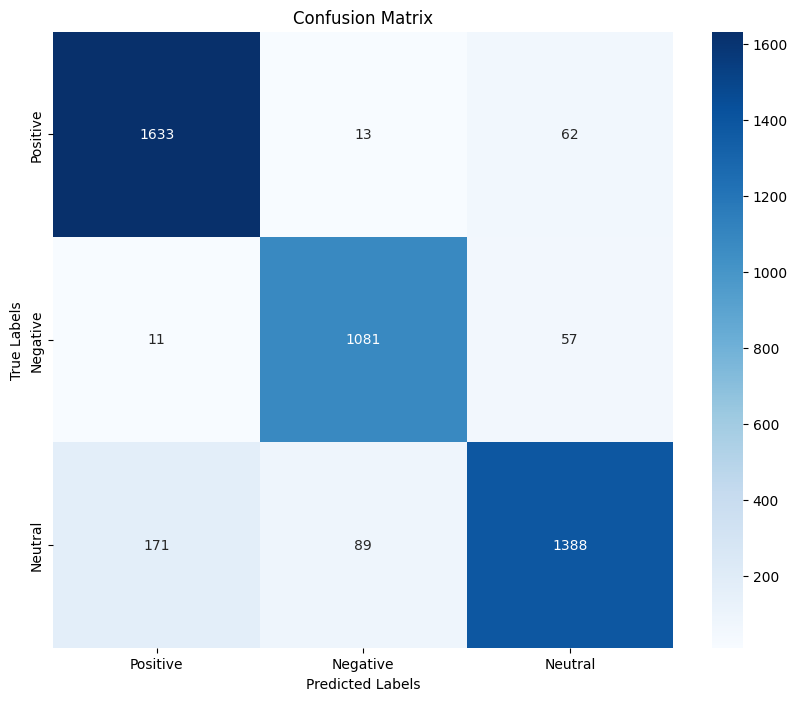

In [53]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Fine-Tuned Roberta Model on Entire Dataset

In [33]:
### Predict on whole dataset
df2 = df.copy()

df2_labels =  df2.Sentiment.tolist()

# Map string labels to integers
label_map = {"Positive": 0, "Negative": 1, "Neutral": 2}
df2_labels = [label_map[label] for label in df2_labels]

# Tokenize the data
df2_encoded = tokenizer(df.Tweet.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt", add_special_tokens=True)

# Prepare the data for Trainer
df2_dataset = torch.utils.data.TensorDataset(df2_encoded['input_ids'], df2_encoded['attention_mask'], torch.tensor(df2_labels))

In [34]:
# Save the test dataset
torch.save(df2_dataset, 'df2.pt')

In [35]:
# Iterate through the test dataset and print the tensors
for item in df2_dataset:
    input_ids, attention_mask, labels = item
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)
    print("=" * 30)
    break # Examine the first tensor

Input IDs: tensor([    0,  2264,    32,    52,  4835,   452,   787,   565,  3964,   260,
          565, 21700,  1437, 50118,  1039, 21067,   387, 12541,  1215,  1437,
        50118,  1039,   462,   330,  3976,  1215,   337,  2977,  1437, 50118,
         1039,   337,  1215,  2977,  4057,  1437, 50118, 50118, 10431, 10988,
          347,   658,   844,  2036,  1205,   640,    90,     4,   876,    73,
          673,  2538,   246,   565,   329,   705,   534,   245,   298,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,    

In [36]:
from transformers import RobertaForSequenceClassification
from sklearn.metrics import accuracy_score

# Load the fine-tuned model
fine_tuned_model = RobertaForSequenceClassification.from_pretrained('./fine_tuned_model')

# Load the df2 dataset
df2_dataset = torch.load('df2.pt')

df2_input_ids = df2_encoded['input_ids']
df2_attention_mask = df2_encoded['attention_mask']
df2_labels = torch.tensor(df2_labels)

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the dataset
for i in range(len(df2_input_ids)):
    input_ids = df2_input_ids[i].unsqueeze(0)
    attention_mask = df2_attention_mask[i].unsqueeze(0)
    label = df2_labels[i].item()

    # Get model predictions
    with torch.no_grad():
        logits = fine_tuned_model(input_ids=input_ids, attention_mask=attention_mask).logits

    # Convert logits to predicted label
    predicted_label = torch.argmax(logits, dim=1).item()

    true_labels.append(label)
    predicted_labels.append(predicted_label)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 96.23%


In [48]:
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1_score))

Precision: 0.96
Recall: 0.96
F1-Score: 0.96


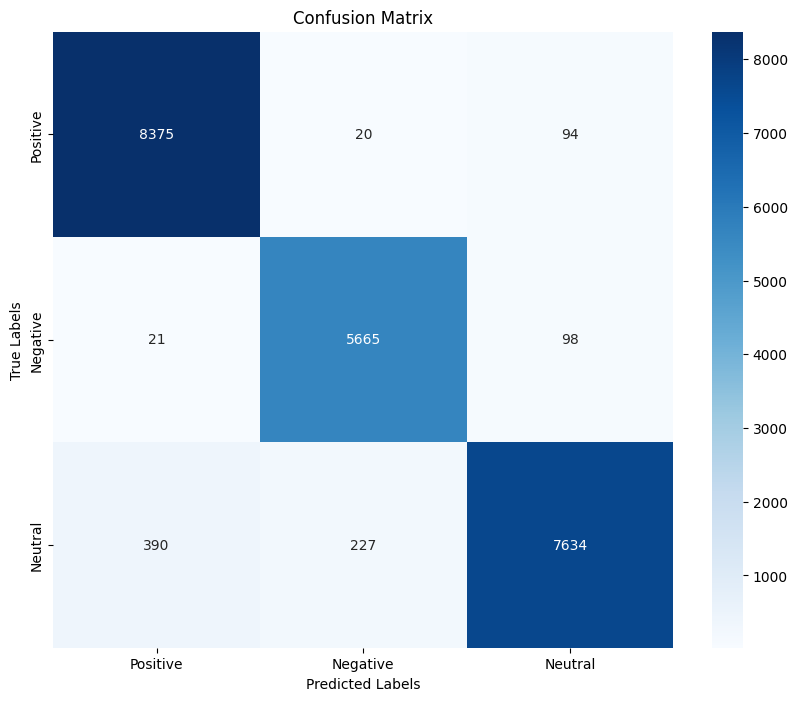

In [49]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Deep Learning and Keras

#### Single LSTM

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture in deep learning designed to overcome the vanishing gradient problem, which hinders the training of traditional RNNs on long sequences.

LSTMs have shown remarkable performance in sentiment analysis on tweets due to their ability to capture the contextual information, handle varying input lengths, and model intricate linguistic patterns. They are a powerful tool for extracting sentiment-related insights from short and informal text, enabling better understanding of public opinion and sentiment trends on social media platforms.

In [114]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,preprocessed_tweet,vader_sentiment,Sentiment_Num
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,Neutral,drinking today worldcup,Neutral,1
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,Positive,amazing worldcup launch video show much face c...,Positive,2
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,Positive,worth reading watching worldcup,Positive,2
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,Positive,golden maknae shinning bright jeonjungkook jun...,Positive,2
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",Negative,bbc care much human right homosexual right wom...,Positive,0


In [139]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
import tensorflow as tf

In [124]:
# Label Encoding
labels = np.array(df['Sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(1)
    if labels[i] == 'Positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [119]:
data = df.preprocessed_tweet.tolist()

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 1688   18    1]
 [   0    0    0 ...    4    9  314]
 [   0    0    0 ... 1769   49    1]
 ...
 [   0    0    0 ...  446   27    1]
 [   0    0    0 ...   85  910    1]
 [   0    0    0 ... 4204   10    1]]


In [125]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

16893 5631 16893 5631


In [127]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

lstm_model = Sequential()
lstm_model.add(layers.Embedding(max_words, 20)) #The embedding layer
lstm_model.add(layers.LSTM(15,dropout=0.5)) #Our LSTM layer
lstm_model.add(layers.Dense(3,activation='softmax'))


lstm_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = lstm_model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/100
527/528 [============================>.] - ETA: 0s - loss: 0.9603 - accuracy: 0.5114
Epoch 1: val_accuracy improved from -inf to 0.60167, saving model to best_model1.hdf5
528/528 [==============================] - 14s 24ms/step - loss: 0.9600 - accuracy: 0.5118 - val_loss: 0.8283 - val_accuracy: 0.6017
Epoch 2/100
528/528 [==============================] - ETA: 0s - loss: 0.7668 - accuracy: 0.6442
Epoch 2: val_accuracy improved from 0.60167 to 0.66205, saving model to best_model1.hdf5
528/528 [==============================] - 13s 24ms/step - loss: 0.7668 - accuracy: 0.6442 - val_loss: 0.7454 - val_accuracy: 0.6620
Epoch 3/100
526/528 [============================>.] - ETA: 0s - loss: 0.6874 - accuracy: 0.7002
Epoch 3: val_accuracy improved from 0.66205 to 0.69188, saving model to best_model1.hdf5
528/528 [==============================] - 13s 24ms/step - loss: 0.6874 - accuracy: 0.7003 - val_loss: 0.7038 - val_accuracy: 0.6919
Epoch 4/100
526/528 [=========================

#### Bidirectional LTSM model

Bidirectional Long Short-Term Memory (BiLSTM) is an extension of the traditional LSTM architecture that enhances the ability to capture contextual information in sequential data by processing input sequences in both forward and backward directions. The model has a unique capability to consider both past and future context when making predictions.

Bidirectional LSTMs offer significant advantages for sentiment analysis on tweets by considering the complete context of words in both directions. This approach is well-suited for capturing the intricate sentiment patterns present in short and informal text, making it a valuable tool for understanding public sentiment trends and opinions on social media platforms.

In [142]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/100
528/528 [==============================] - ETA: 0s - loss: 0.9628 - accuracy: 0.5139
Epoch 1: val_accuracy improved from -inf to 0.58995, saving model to best_model2.hdf5
528/528 [==============================] - 17s 29ms/step - loss: 0.9628 - accuracy: 0.5139 - val_loss: 0.8412 - val_accuracy: 0.5899
Epoch 2/100
528/528 [==============================] - ETA: 0s - loss: 0.7622 - accuracy: 0.6552
Epoch 2: val_accuracy improved from 0.58995 to 0.67608, saving model to best_model2.hdf5
528/528 [==============================] - 15s 28ms/step - loss: 0.7622 - accuracy: 0.6552 - val_loss: 0.7377 - val_accuracy: 0.6761
Epoch 3/100
528/528 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.7024
Epoch 3: val_accuracy improved from 0.67608 to 0.69490, saving model to best_model2.hdf5
528/528 [==============================] - 15s 28ms/step - loss: 0.6858 - accuracy: 0.7024 - val_loss: 0.7008 - val_accuracy: 0.6949
Epoch 4/100
527/528 [=========================

#### 1D Convolutional Neural Networks

In [145]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40, input_length=max_len))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),
                         bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(5))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),
                         bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(3,activation='softmax'))
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history = model3.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
528/528 [==============================] - 2s 3ms/step - loss: 1.1745 - acc: 0.3772 - val_loss: 1.0912 - val_acc: 0.3710
Epoch 2/100
528/528 [==============================] - 2s 3ms/step - loss: 1.0927 - acc: 0.3762 - val_loss: 1.0912 - val_acc: 0.3710
Epoch 3/100
528/528 [==============================] - 2s 3ms/step - loss: 1.0928 - acc: 0.3770 - val_loss: 1.0912 - val_acc: 0.3710
Epoch 4/100
528/528 [==============================] - 2s 3ms/step - loss: 1.0927 - acc: 0.3765 - val_loss: 1.0922 - val_acc: 0.3710
Epoch 5/100
528/528 [==============================] - 2s 4ms/step - loss: 1.0927 - acc: 0.3790 - val_loss: 1.0915 - val_acc: 0.3710
Epoch 6/100
528/528 [==============================] - 2s 3ms/step - loss: 1.0927 - acc: 0.3784 - val_loss: 1.0908 - val_acc: 0.3710
Epoch 7/100
528/528 [==============================] - 2s 3ms/step - loss: 1.0926 - acc: 0.3754 - val_loss: 1.0916 - val_acc: 0.3710
Epoch 8/100
528/528 [==============================] - 3s 5ms/step - 

### Best LTSM model validation

In [147]:
import keras
best_model = keras.models.load_model("best_model2.hdf5")

In [148]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

176/176 - 2s - loss: 0.6793 - accuracy: 0.7274 - 2s/epoch - 9ms/step
Model accuracy:  0.7274019122123718


In [150]:
predictions = best_model.predict(X_test)
predictions

176/176 [==============================] - 1s 6ms/step


array([[0.11727185, 0.86271244, 0.02001567],
       [0.20059192, 0.00178094, 0.79762715],
       [0.7676636 , 0.03574836, 0.19658808],
       ...,
       [0.00956155, 0.00127574, 0.9891627 ],
       [0.83444643, 0.15601608, 0.0095375 ],
       [0.29233518, 0.6660109 , 0.04165387]], dtype=float32)

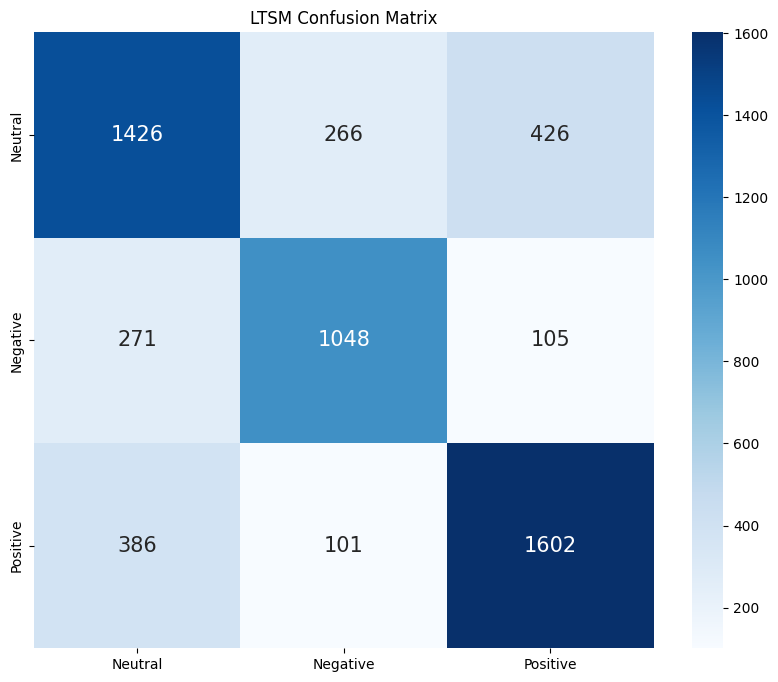

In [155]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

conf_matrix = pd.DataFrame(matrix, index=['Neutral', 'Negative', 'Positive'], columns=['Neutral', 'Negative', 'Positive'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 15}, cmap = "Blues")
plt.title("LTSM Confusion Matrix") 
plt.show()  # Display the heatmap

## Conclusion

**Business Outcomes:**

- **Real-time Monitoring:** Stakeholders can monitor sentiment in real-time to address negative sentiment promptly and capitalize on positive sentiment.

- **Audience Engagement:** Marketing teams can tailor their campaigns based on the sentiment analysis results to resonate better with the audience.

- **Brand Perception:** Sponsors can evaluate their brand's perception among fans and adjust strategies accordingly.

- **Fan Experience Enhancement:** Event organizers can leverage sentiment analysis to identify areas of improvement and subsequently enhance the overall fan experience, ensuring maximum satisfaction.

- **Crisis Management:** Detect potential controversies or negative incidents quickly and take corrective actions to mitigate their impact.

- **Post-Event Analysis:** 

After the World Cup, conduct a comprehensive sentiment analysis to gain insights into the event's success, fan experience, and areas for improvement in future editions.

In summary, conducting sentiment analysis on tweets from the FIFA World Cup 2022 can provide valuable insights that impact decision-making, engagement strategies, and overall event experience. It empowers stakeholders to understand public sentiment and use it to optimize their actions and strategies in real-time.

**Results:**
As seen from our steps above, the fine-tuned Roberta Model is the best model with the highest score across all of the metrics. Therefore, we will be using that as our final model. 

Here are the metrics(training-test split data):

- Accuracy: 0.91
- Precision: 0.91
- Recall: 0.91
- F1-Score: 0.91

**Next step:**

While I have come to the conclusion that the Neural Network model shows some potential. If I finetune it, I believe that I can make the model better with a higher accuracy than the RoBERTa model.